# **PROYECTO FINAL DE JUAN SEGUNDO GNARRA**

## **Introduccion**

Resumen

Este proyecto tiene como objetivo predecir la cantidad de ventas futuras por categoría y estimar los ingresos futuros de los vendedores utilizando datos históricos de ventas de Amazon. Para lograrlo, se realizó un Análisis Exploratorio de Datos (EDA) detallado, seguido de la selección de características más relevantes y el entrenamiento de modelos de regresión.

Entre los hallazgos clave se encuentran:
- La identificación de categorías de productos con mayores ventas y patrones estacionales.
- La correlación entre las variables de ventas históricas y las proyecciones futuras de ingresos.
- Modelos de regresión que ofrecen predicciones precisas para la planificación de inventarios y estrategias de ventas.

Este análisis proporciona información valiosa para que los vendedores se preparen mejor para las demandas futuras y optimicen sus ingresos.

Objetivo

Desarrollar modelos predictivos que anticipen la cantidad de ventas futuras por categoría y los ingresos futuros de los vendedores. Esto permitirá una mejor planificación y estrategias optimizadas para los vendedores.

Contexto Comercial

Amazon Inc., como líder en el comercio electrónico global, está comprometida con el éxito de los vendedores particulares que utilizan su plataforma. Para ayudar a estos vendedores a organizarse mejor y crecer, Amazon implementa análisis de datos avanzados y modelos predictivos que anticipan las tendencias de ventas y los ingresos futuros.

Con el objetivo de proporcionar un soporte integral, Amazon busca predecir la cantidad de ventas futuras por categoría y los ingresos futuros de los vendedores. Esta información permite a los vendedores particulares planificar sus inventarios, ajustar sus estrategias de marketing y maximizar su rentabilidad. Al mejorar la capacidad de previsión de los vendedores, Amazon fortalece su ecosistema de comercio electrónico y asegura un crecimiento sostenible para todos los actores involucrados.

Este proyecto se centra en utilizar datos históricos de ventas para desarrollar modelos que ayuden a los vendedores a optimizar sus operaciones y alcanzar nuevos niveles de éxito en la plataforma de Amazon.

Hipótesis

1. **Hipótesis de Regresión**:
   - "Utilizando datos históricos de ventas, se puede desarrollar un modelo que prediga con precisión la cantidad de ventas futuras por categoría. Esto permitirá a los vendedores particulares planificar mejor sus inventarios y estrategias de marketing."

2. **Hipótesis de Correlación**:
   - "Existe una correlación significativa entre las ventas históricas de un vendedor y sus ingresos futuros, lo que sugiere que los datos históricos pueden ser utilizados para predecir los ingresos futuros de los vendedores en la plataforma de Amazon."

## **Analisis Exploratorio De Datos**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/DATASET-AMAZON-SALES-CODERHOUSE (1).xlsx'
df = pd.read_excel(file_path)

print("Contenido del dataset:")
print(df.head())

Contenido del dataset:
         Order ID Order Date  Ship Date                   EmailID  \
0  CA-2013-138688 2013-06-13 2013-06-17   DarrinVanHuff@gmail.com   
1  CA-2011-115812 2011-06-09 2011-06-14  BrosinaHoffman@gmail.com   
2  CA-2011-115812 2011-06-09 2011-06-14  BrosinaHoffman@gmail.com   
3  CA-2011-115812 2011-06-09 2011-06-14  BrosinaHoffman@gmail.com   
4  CA-2011-115812 2011-06-09 2011-06-14  BrosinaHoffman@gmail.com   

                              Geography     Category  \
0  United States,Los Angeles,California       Labels   
1  United States,Los Angeles,California  Furnishings   
2  United States,Los Angeles,California          Art   
3  United States,Los Angeles,California       Phones   
4  United States,Los Angeles,California      Binders   

                                        Product Name    Sales  Quantity  \
0  Self-Adhesive Address Labels for Typewriters b...   14.620         2   
1  Eldon Expressions Wood and Plastic Desk Access...   48.860         7   


In [4]:
# Información general del dataset
print("Información general del dataset:")
print(df.info())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB
None


In [5]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
Order ID        0
Order Date      0
Ship Date       0
EmailID         0
Geography       0
Category        0
Product Name    0
Sales           0
Quantity        0
Profit          0
dtype: int64


Descripción de las Variables

- **Order ID**: Identificador único de cada orden.
- **Order Date**: Fecha en la que se realizó la orden.
- **Ship Date**: Fecha en la que se envió la orden.
- **EmailID**: Correo electrónico del cliente.
- **Geography**: Ubicación del cliente.
- **Category**: Categoría del producto.
- **Product Name**: Nombre del producto.
- **Sales**: Monto de las ventas.
- **Quantity**: Cantidad de productos vendidos.
- **Profit**: Ganancia obtenida de la venta.

In [6]:
# Estadísticas descriptivas
print("Estadísticas descriptivas de las variables numéricas:")
print(df.describe())

Estadísticas descriptivas de las variables numéricas:
                          Order Date                      Ship Date  \
count                           3203                           3203   
mean   2013-05-10 03:06:07.530440192  2013-05-14 01:25:25.195129600   
min              2011-01-07 00:00:00            2011-01-09 00:00:00   
25%              2012-05-22 00:00:00            2012-05-26 00:00:00   
50%              2013-07-22 00:00:00            2013-07-25 00:00:00   
75%              2014-05-23 00:00:00            2014-05-27 00:00:00   
max              2014-12-31 00:00:00            2015-01-06 00:00:00   
std                              NaN                            NaN   

              Sales     Quantity       Profit  
count   3203.000000  3203.000000  3203.000000  
mean     226.493233     3.828910    33.849032  
min        0.990000     1.000000 -3399.980000  
25%       19.440000     2.000000     3.852000  
50%       60.840000     3.000000    11.166400  
75%      215.80900

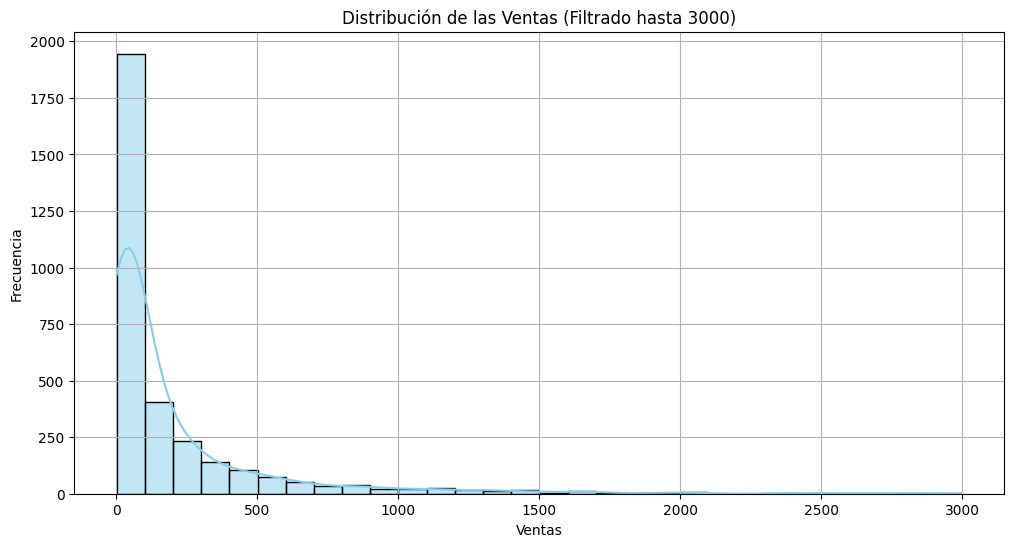

In [7]:
# Distribución de las ventas
plt.figure(figsize=(12, 6))
filtered_sales = df[df['Sales'] <= 3000]
sns.histplot(filtered_sales['Sales'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de las Ventas (Filtrado hasta 3000)')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

<ipython-input-8-f763262e82a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Profit', data=df, palette='Set2')


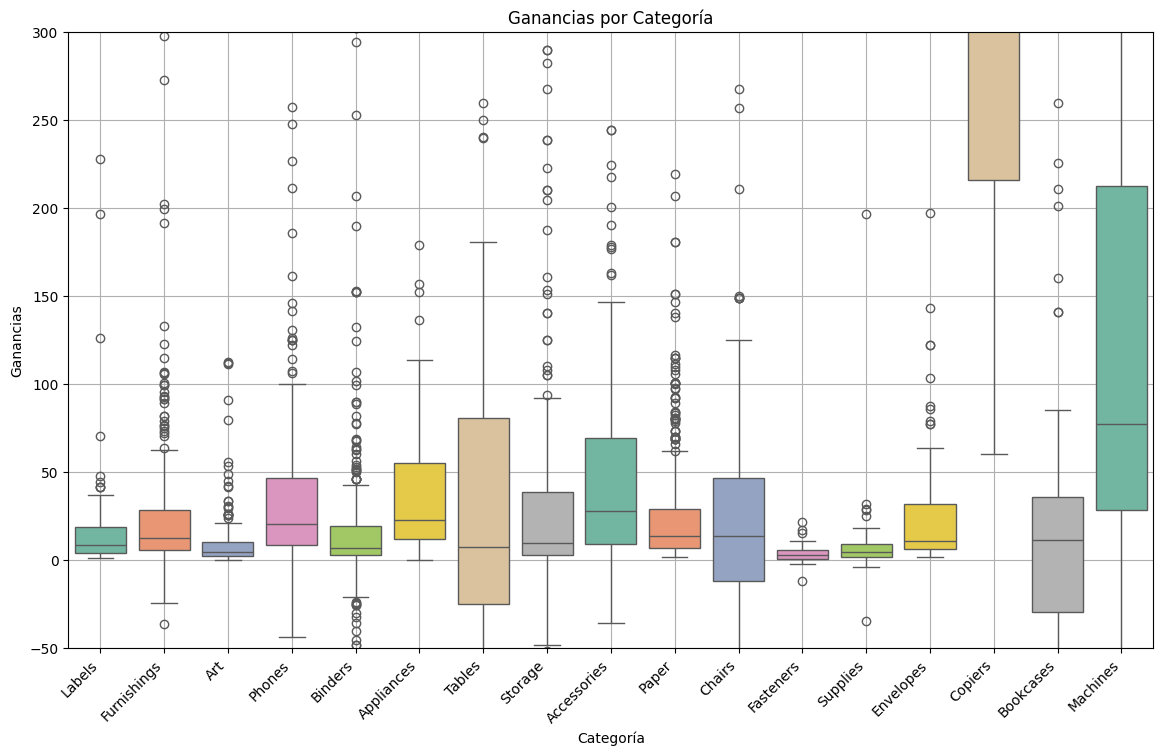

In [8]:
# Boxplot de las ganancias por categoría
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Profit', data=df, palette='Set2')
plt.title('Ganancias por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ganancias')
plt.xticks(rotation=45, ha='right')
plt.ylim(-50, 300)  # Ajustar según sea necesario
plt.grid(True)
plt.show()

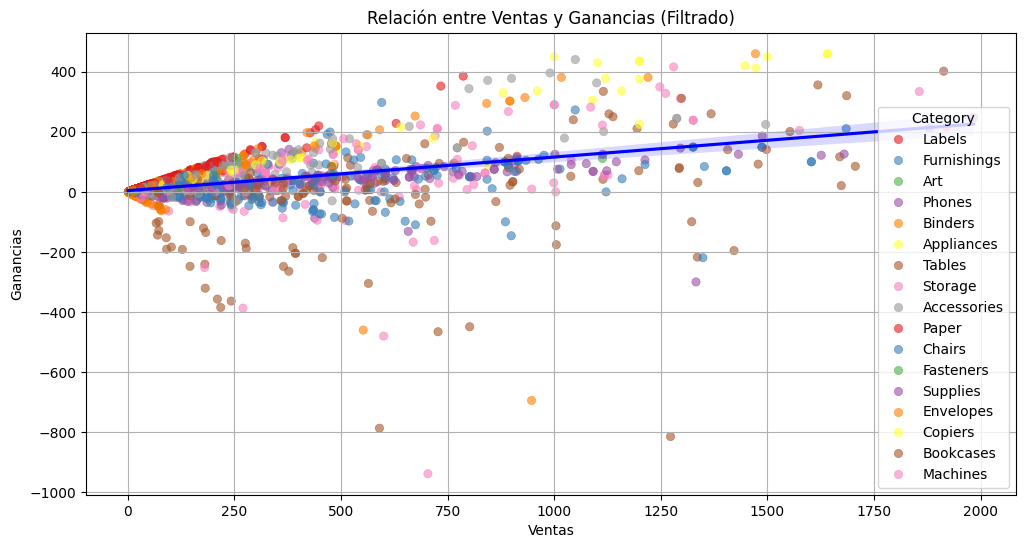

In [9]:
# Gráfico de dispersión de Ventas vs Ganancias
filtered_df = df[(df['Sales'] <= 2000) & (df['Profit'] <= 500)]
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sales', y='Profit', data=filtered_df, hue='Category', palette='Set1', alpha=0.6, edgecolor=None)
sns.regplot(x='Sales', y='Profit', data=filtered_df, scatter=False, color='blue')
plt.title('Relación entre Ventas y Ganancias (Filtrado)')
plt.xlabel('Ventas')
plt.ylabel('Ganancias')
plt.grid(True)
plt.show()

## **Exploracion De Relaciones**

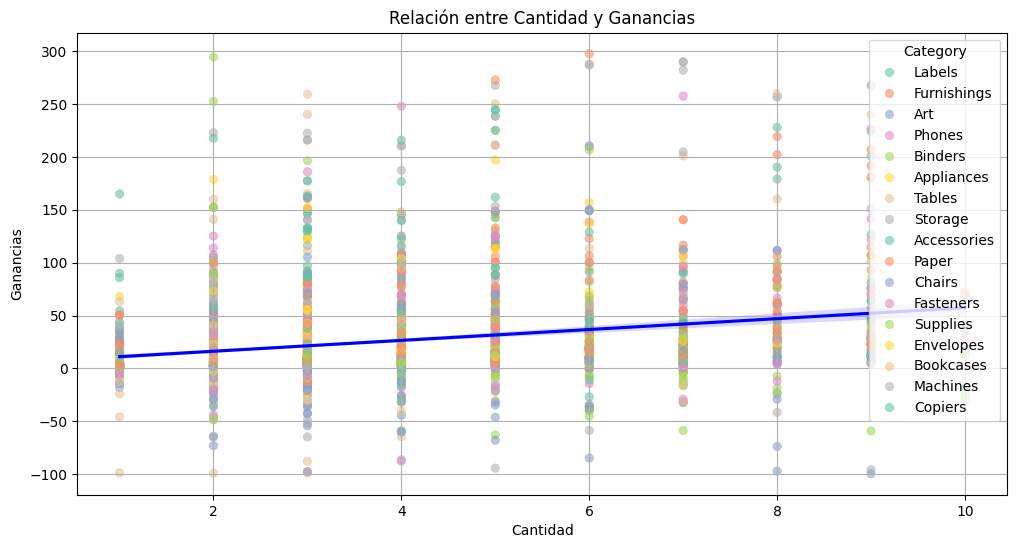

In [59]:
# Filtrar valores atípicos
filtered_df = df[(df['Profit'] <= 300) & (df['Profit'] >= -100) & (df['Quantity'] <= 10)]

# Gráfico de dispersión entre Quantity y Profit
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Quantity', y='Profit', data=filtered_df, hue='Category', palette='Set2', alpha=0.6, edgecolor=None)
sns.regplot(x='Quantity', y='Profit', data=filtered_df, scatter=False, color='blue')
plt.title('Relación entre Cantidad y Ganancias')
plt.xlabel('Cantidad')
plt.ylabel('Ganancias')
plt.grid(True)
plt.show()

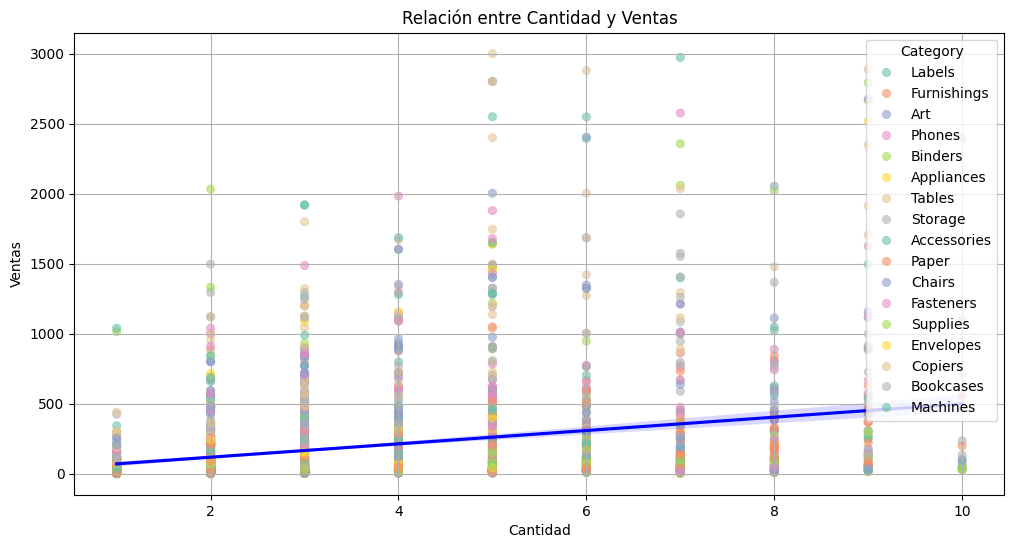

In [21]:
# Filtrar valores atípicos
filtered_df = df[(df['Sales'] <= 3000) & (df['Quantity'] <= 10)]

# Gráfico de dispersión entre Quantity y Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Quantity', y='Sales', data=filtered_df, hue='Category', palette='Set2', alpha=0.6, edgecolor=None)
sns.regplot(x='Quantity', y='Sales', data=filtered_df, scatter=False, color='blue')
plt.title('Relación entre Cantidad y Ventas')
plt.xlabel('Cantidad')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

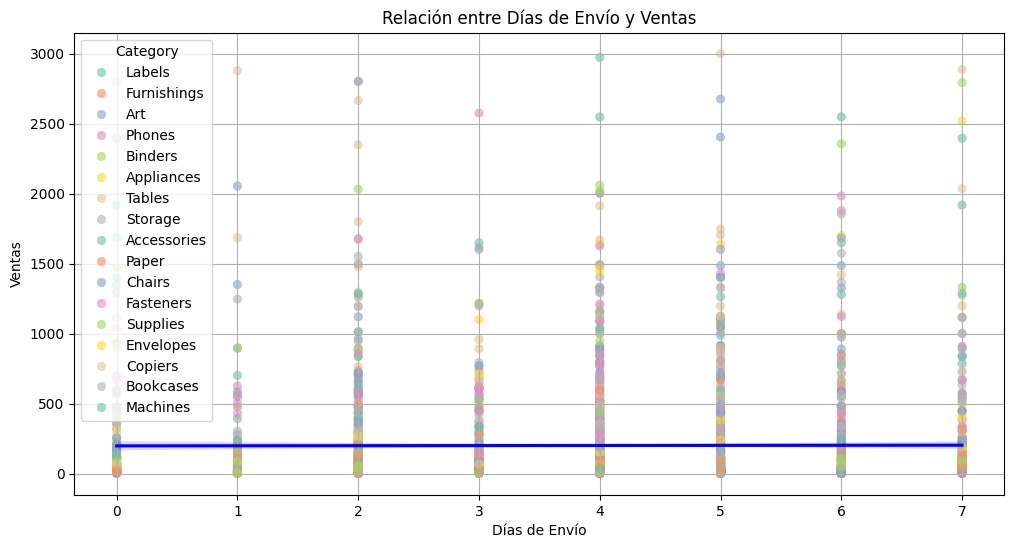

In [20]:
# Filtrar valores atípicos
filtered_df = df[(df['Sales'] <= 3000) & (df['Ship_Days'] <= 30)]

# Gráfico de dispersión entre Sales y Ship Days
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Ship_Days', y='Sales', data=filtered_df, hue='Category', palette='Set2', alpha=0.6, edgecolor=None)
sns.regplot(x='Ship_Days', y='Sales', data=filtered_df, scatter=False, color='blue')
plt.title('Relación entre Días de Envío y Ventas')
plt.xlabel('Días de Envío')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

### Manejo de valores atípicos y valores perdidos

<ipython-input-32-534b6e5de020>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sales', data=df, palette='Set2')


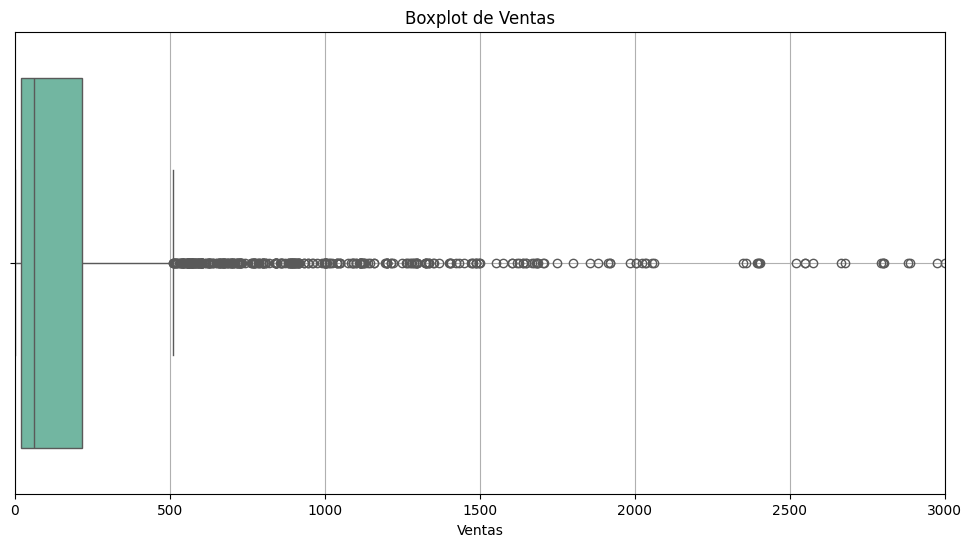

In [32]:
# Identificación de valores atípicos en Sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sales', data=df, palette='Set2')
plt.title('Boxplot de Ventas')
plt.xlabel('Ventas')
plt.xlim(0, 3000)
plt.grid(True)
plt.show()

<ipython-input-33-fa6962696fb4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Profit', data=df, palette='Set2')


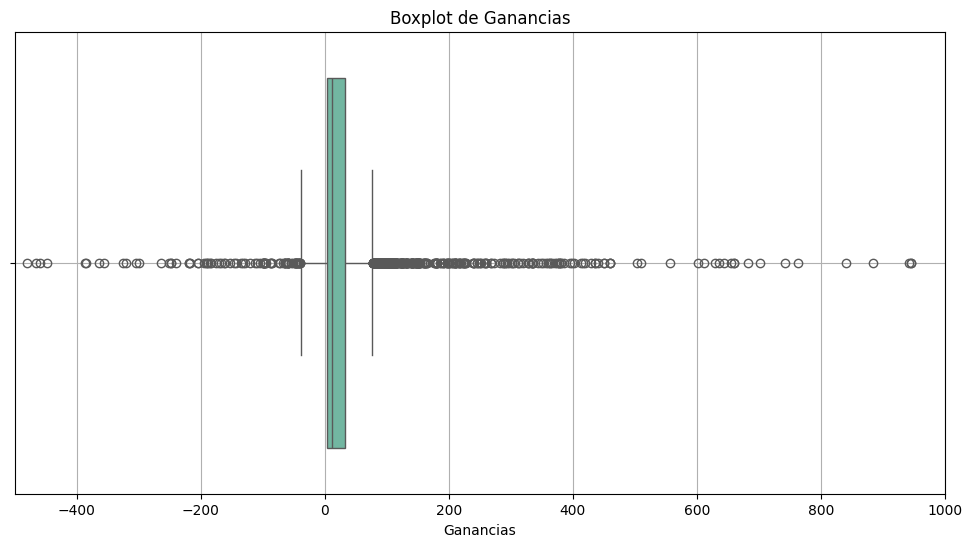

In [33]:
# Identificación de valores atípicos en Profit (límite de -500 a 1000)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Profit', data=df, palette='Set2')
plt.title('Boxplot de Ganancias')
plt.xlabel('Ganancias')
plt.xlim(-500, 1000)
plt.grid(True)
plt.show()

<ipython-input-26-df49e45c2eab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Quantity', data=df, palette='Set2')


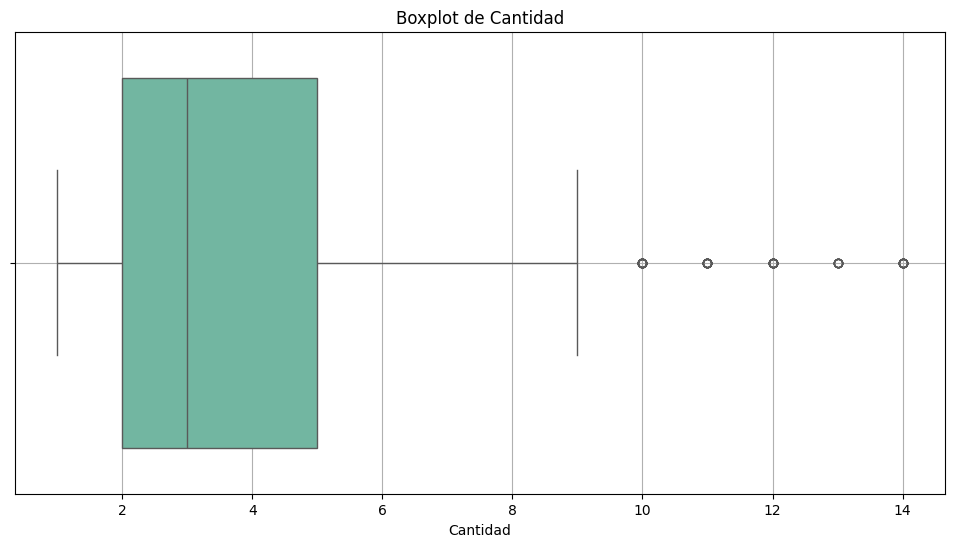

In [26]:
# Identificación de valores atípicos en Quantity
plt.figure(figsize=(12, 6))
sns.boxplot(x='Quantity', data=df, palette='Set2')
plt.title('Boxplot de Cantidad')
plt.xlabel('Cantidad')
plt.grid(True)
plt.show()

## **Analisis De Variables Relacionadas**

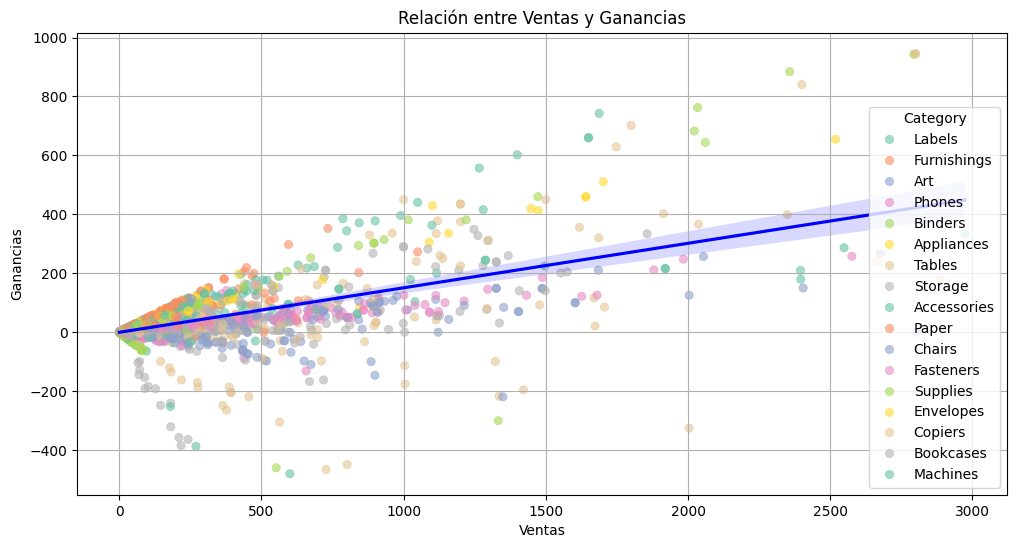

In [35]:
# Filtrar valores atípicos para ventas y ganancias
filtered_df_sales_profit = df[(df['Sales'] <= 3000) & (df['Profit'] <= 1000) & (df['Profit'] >= -500)]

# Gráfico de dispersión entre Sales y Profit
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sales', y='Profit', data=filtered_df_sales_profit, hue='Category', palette='Set2', alpha=0.6, edgecolor=None)
sns.regplot(x='Sales', y='Profit', data=filtered_df_sales_profit, scatter=False, color='blue')
plt.title('Relación entre Ventas y Ganancias')
plt.xlabel('Ventas')
plt.ylabel('Ganancias')
plt.grid(True)
plt.show()

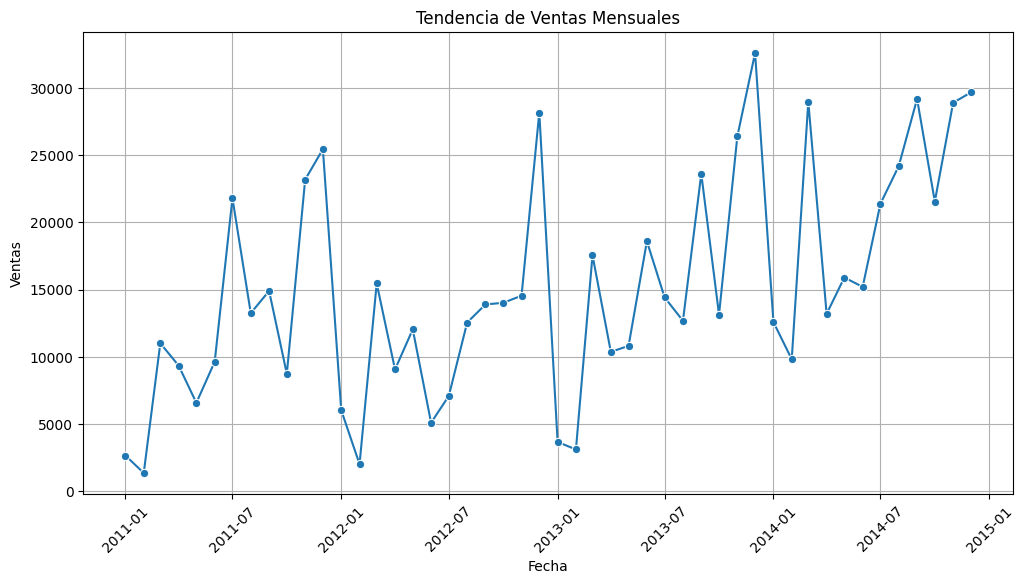

In [60]:
# Convertir Order Date a datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Crear columna de año y mes para análisis de tendencia
df['YearMonth'] = df['Order Date'].dt.to_period('M')

# Agrupar ventas por YearMonth
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

# Convertir YearMonth a timestamp para la visualización
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

# Gráfico de tendencia de ventas mensuales
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Sales', data=monthly_sales, marker='o')
plt.title('Tendencia de Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-38-b4b680a4b15f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=df, palette='Set2')


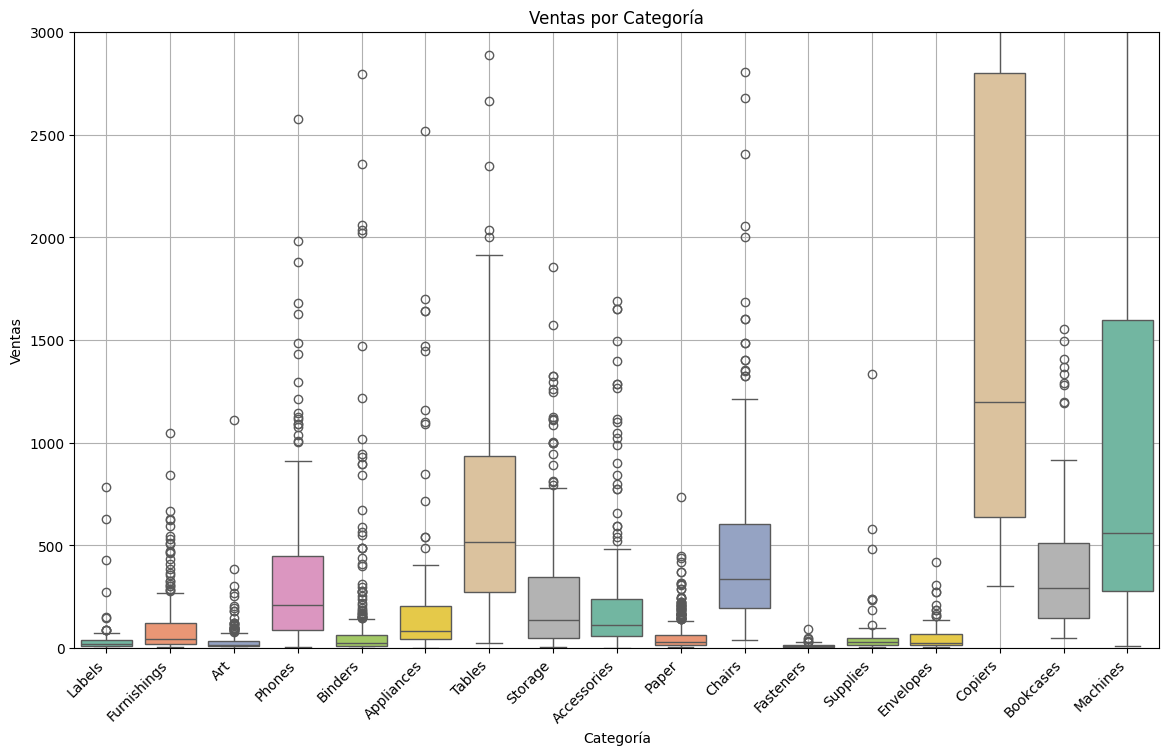

In [38]:
# Boxplot de las ventas por categoría
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Sales', data=df, palette='Set2')
plt.title('Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 3000)  # Ajustar según sea necesario
plt.grid(True)
plt.show()

## **Resumen y Concluciones**

Resumen

- **Distribución de Ventas**: La mayoría de las ventas se encuentran por debajo de $3000, con una distribución sesgada positivamente.
- **Ganancias**: Las ganancias están mayormente concentradas entre -500 y 1000, con algunos valores extremos negativos y positivos que han sido filtrados.
- **Cantidad Vendida**: La mayoría de las transacciones involucran menos de 10 unidades por orden.
- **Relaciones**:
  - Existe una correlación positiva entre ventas y ganancias, lo que significa que a medida que aumentan las ventas, también tienden a aumentar las ganancias.
  - La cantidad de productos vendidos tiene una relación positiva tanto con las ventas como con las ganancias, indicando que vender más unidades generalmente resulta en mayores ventas totales y ganancias.
- **Tendencias de Ventas**: Las ventas mensuales muestran una tendencia general de crecimiento a lo largo del tiempo.
- **Categorías de Productos**: Algunas categorías muestran mayores ventas y ganancias comparadas con otras, indicando una posible concentración de demanda en ciertos tipos de productos.


Conclusiones

1. **Identificación de Patrones Clave**:
   - La correlación positiva entre ventas y ganancias sugiere que incrementar las ventas podría directamente aumentar las ganancias.
   - Las categorías de productos con mayores ventas deberían ser el foco para estrategias de marketing y promoción.

2. **Tendencias y Estacionalidad**:
   - La tendencia creciente en las ventas mensuales indica un crecimiento sostenido en la plataforma, lo cual es un buen indicador de la salud del negocio.
   - Analizar las tendencias estacionales podría proporcionar insights adicionales para optimizar el inventario y las estrategias de marketing.

## **Analisis De Correlacion**

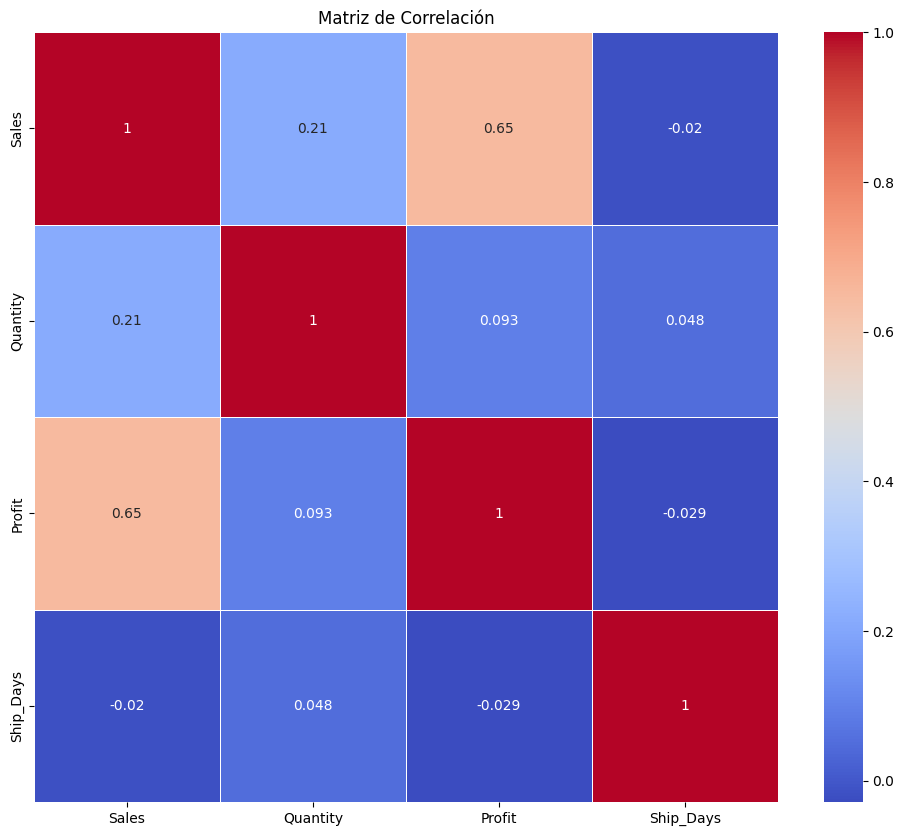

Características más correlacionadas con Sales:
 Sales        1.000000
Profit       0.647477
Quantity     0.214665
Ship_Days   -0.019958
Name: Sales, dtype: float64

Características más correlacionadas con Profit:
 Profit       1.000000
Sales        0.647477
Quantity     0.093240
Ship_Days   -0.028638
Name: Profit, dtype: float64


In [40]:
# Filtrar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[float, int])

# Matriz de correlación
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title('Matriz de Correlación')
plt.show()

# Seleccionar características más correlacionadas con Sales y Profit
corr_sales = correlation_matrix['Sales'].sort_values(ascending=False)
corr_profit = correlation_matrix['Profit'].sort_values(ascending=False)

print("Características más correlacionadas con Sales:\n", corr_sales)
print("\nCaracterísticas más correlacionadas con Profit:\n", corr_profit)

In [41]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Separar las características y las variables objetivo
X = df[['Quantity', 'Ship_Days']]  # Agrega aquí otras características relevantes
y_sales = df['Sales']
y_profit = df['Profit']

# Usar SelectKBest para Sales
selector_sales = SelectKBest(score_func=f_regression, k='all')
selector_sales.fit(X, y_sales)
scores_sales = selector_sales.scores_

# Usar SelectKBest para Profit
selector_profit = SelectKBest(score_func=f_regression, k='all')
selector_profit.fit(X, y_profit)
scores_profit = selector_profit.scores_

print("Puntuaciones de características para Sales:\n", scores_sales)
print("Puntuaciones de características para Profit:\n", scores_profit)

# Usar RFE para Sales
model = LinearRegression()
rfe_sales = RFE(model, n_features_to_select=1)
rfe_sales.fit(X, y_sales)
ranking_sales = rfe_sales.ranking_

# Usar RFE para Profit
rfe_profit = RFE(model, n_features_to_select=1)
rfe_profit.fit(X, y_profit)
ranking_profit = rfe_profit.ranking_

print("Ranking de características para Sales (RFE):\n", ranking_sales)
print("Ranking de características para Profit (RFE):\n", ranking_profit)

Puntuaciones de características para Sales:
 [154.63119195   1.27554362]
Puntuaciones de características para Profit:
 [28.07276764  2.62731722]
Ranking de características para Sales (RFE):
 [1 2]
Ranking de características para Profit (RFE):
 [1 2]


## **Modelado**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separar las características y la variable objetivo
X = df[['Quantity']]
y_sales = df['Sales']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_sales, test_size=0.2, random_state=42)

# Entrenar el modelo
model_sales = LinearRegression()
model_sales.fit(X_train, y_train)

# Realizar predicciones
y_pred_sales = model_sales.predict(X_test)

# Calcular métricas
mse_sales = mean_squared_error(y_test, y_pred_sales)
r2_sales = r2_score(y_test, y_pred_sales)

print("Métricas para Sales:")
print("Mean Squared Error:", mse_sales)
print("R^2 Score:", r2_sales)

Métricas para Sales:
Mean Squared Error: 190228.15512768144
R^2 Score: 0.07989026235044916


In [43]:
# Separar las características y la variable objetivo
y_profit = df['Profit']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_profit, test_size=0.2, random_state=42)

# Entrenar el modelo
model_profit = LinearRegression()
model_profit.fit(X_train, y_train)

# Realizar predicciones
y_pred_profit = model_profit.predict(X_test)

# Calcular métricas
mse_profit = mean_squared_error(y_test, y_pred_profit)
r2_profit = r2_score(y_test, y_pred_profit)

print("Métricas para Profit:")
print("Mean Squared Error:", mse_profit)
print("R^2 Score:", r2_profit)

Métricas para Profit:
Mean Squared Error: 29923.68867652441
R^2 Score: -0.0010204207517316988


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Incluir más características
X = df[['Quantity', 'Ship_Days']]  # Agrega otras características relevantes aquí

# Separar las variables objetivo
y_sales = df['Sales']
y_profit = df['Profit']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(X, y_sales, test_size=0.2, random_state=42)
X_train_profit, X_test_profit, y_train_profit, y_test_profit = train_test_split(X, y_profit, test_size=0.2, random_state=42)

In [55]:
# Entrenar el modelo de regresión lineal para Sales
model_sales = LinearRegression()
model_sales.fit(X_train_sales, y_train_sales)

# Realizar predicciones
y_pred_sales = model_sales.predict(X_test_sales)

# Calcular métricas para Sales
mse_sales = mean_squared_error(y_test_sales, y_pred_sales)
r2_sales = r2_score(y_test_sales, y_pred_sales)

print("Métricas para Sales (Regresión Lineal):")
print("Mean Squared Error:", mse_sales)
print("R^2 Score:", r2_sales)

Métricas para Sales (Regresión Lineal):
Mean Squared Error: 189719.12880972042
R^2 Score: 0.08235235883433445


In [56]:
# Entrenar el modelo de regresión lineal para Profit
model_profit = LinearRegression()
model_profit.fit(X_train_profit, y_train_profit)

# Realizar predicciones
y_pred_profit = model_profit.predict(X_test_profit)

# Calcular métricas para Profit
mse_profit = mean_squared_error(y_test_profit, y_pred_profit)
r2_profit = r2_score(y_test_profit, y_pred_profit)

print("Métricas para Profit (Regresión Lineal):")
print("Mean Squared Error:", mse_profit)
print("R^2 Score:", r2_profit)

Métricas para Profit (Regresión Lineal):
Mean Squared Error: 29834.830875313088
R^2 Score: 0.0019520895733544652


In [57]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar el modelo Random Forest para Sales
rf_model_sales = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_sales.fit(X_train_sales, y_train_sales)
y_pred_rf_sales = rf_model_sales.predict(X_test_sales)

# Calcular métricas para Sales
mse_rf_sales = mean_squared_error(y_test_sales, y_pred_rf_sales)
r2_rf_sales = r2_score(y_test_sales, y_pred_rf_sales)

print("Métricas para Sales (Random Forest):")
print("Mean Squared Error:", mse_rf_sales)
print("R^2 Score:", r2_rf_sales)

Métricas para Sales (Random Forest):
Mean Squared Error: 196623.92550698135
R^2 Score: 0.04895472285675795


In [58]:
# Entrenar el modelo Random Forest para Profit
rf_model_profit = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_profit.fit(X_train_profit, y_train_profit)
y_pred_rf_profit = rf_model_profit.predict(X_test_profit)

# Calcular métricas para Profit
mse_rf_profit = mean_squared_error(y_test_profit, y_pred_rf_profit)
r2_rf_profit = r2_score(y_test_profit, y_pred_rf_profit)

print("Métricas para Profit (Random Forest):")
print("Mean Squared Error:", mse_rf_profit)
print("R^2 Score:", r2_rf_profit)

Métricas para Profit (Random Forest):
Mean Squared Error: 31106.63800671506
R^2 Score: -0.04059296306214599


## **Conclucion**

### Análisis de los Resultados del Modelado

1. **Regresión Lineal**:
   - **Sales**: El modelo de regresión lineal no logró predecir `Sales` de manera efectiva, con un `R^2` de 0.08.
   - **Profit**: El modelo de regresión lineal tampoco fue efectivo para predecir `Profit`, con un `R^2` de 0.002.

2. **Random Forest**:
   - **Sales**: El modelo Random Forest también mostró una baja capacidad predictiva para `Sales`, con un `R^2` de 0.049.
   - **Profit**: Similarmente, el modelo Random Forest no fue efectivo para predecir `Profit`, con un `R^2` de -0.041.

### Situación Comercial Hipotética para Amazon

En este proyecto, el objetivo era desarrollar modelos predictivos para ayudar a los vendedores particulares en Amazon a prever sus ventas futuras y los ingresos que podrían generar. Aunque los modelos de regresión lineal y Random Forest no lograron predecir las ventas y ganancias de manera efectiva, el análisis realizado proporciona importantes insights que pueden ser aprovechados por Amazon y sus vendedores.

### Reflexiones Finales

A pesar de los resultados no óptimos, el proyecto ha proporcionado valiosos insights sobre la relación entre las diferentes características y las ventas/ganancias en la plataforma de Amazon.

Este proyecto sienta una base sólida para futuras investigaciones y desarrollos en la predicción de ventas e ingresos en plataformas de comercio electrónico como Amazon. Los insights obtenidos pueden ayudar a los vendedores a comprender mejor sus ventas y ganancias, y a Amazon a desarrollar herramientas predictivas más efectivas para apoyar a sus vendedores.